------------------------------------------------
------------------------------------------------

## Ejercicio 
**Fase 1: Exploración y Limpieza**

1. **Exploración Inicial:**
   - Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
   - Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
   - Une los dos conjuntos de datos de la forma más eficiente. 

------------------------------------------------
------------------------------------------------

In [16]:
gato = r"""                                                                                
 /\_/\  
( o.o )    EL VERDE DEGRADADO DE LAS GRÁFICAS ES MI COLOR FAVORITO, NADA ES POR AZAR. FELIZ DÍA    
 > ^ <
"""
print(gato)

                                                                                
 /\_/\  
( o.o )    EL VERDE DEGRADADO DE LAS GRÁFICAS ES MI COLOR FAVORITO, NADA ES POR AZAR. FELIZ DÍA    
 > ^ <



## **EDA** ##          
## **PASOS QUE HE REALIZADO** ##
**1. Importar librerias panda**

**2 Lectura de los dos CSV**

**3. Exploración inicial (con idea de ver cómo unir mejor mis dos tablas)**

- Ver cabeceras. Primeras filas   `.head()`
- Ver columnas `.columns`
- Compruebo info general/tipo de datos `info.()` 

**Con los datos anteriores ya puedo identificar cuál es la manera más EFICIENTE  de unir ambos DataFrame:**

- Concluyendo que hay una columna identica en ambas tablas llamada: `Loyalty Number` La unión más eficiente se hará con un `merge`

**4. Unión de los dataframe mas eficaz con `merge`**
- Tipo de unión`HOW = LEFT`: Mantiene todas las filas de la iquierda (df_loyalty) es decir, a todos los clientes, aunque no tengan vuelos (tabla derecha = df_flight) y los vacios los rellena con nulos. 

**5. Exploración del nuevo DataFrame resultado de la unión. `df_merge`  a través de una **FUNCIÓN** preciosa.** 
- Ver cabeceras. Primeras filas/ filas intermedias / últimas filas   `.head()` , `.tail()`, `.sample()`
- Ver estructura. Info general/tipo de datos `info.()`
- Ver cuántas filas y columnas tiene (número) `.shape`
- Ver nombres de columnas `columns()`
- Resumen estadístico de las columnas numéricas `Describe().T`
- Ver valores únicos de las columnas categóricas `.value_counts()`
- Ver si existe duplicados e imprimirlos sin borrarlos `.duplicated()`
- Ver a través de GRÁFICAS: HISTOGRÁMAS: (Datos numéricos) BARRAS (Datos categóricos)



In [60]:
# 1: IMPORTAR LAS LIBRERIAS

import pandas as pd
import numpy as np
import random
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [61]:
# 2: Hacer lectura de los dos csv

df_loyalty = pd.read_csv('Customer_Loyalty_History.csv')
df_flight = pd.read_csv('Customer_Flight_Activity.csv')

## **3.Exploración inicial** ##

Idea principal: Con la exploración inicial, lo que pretendo es familiarizarme con los datos que tengo en cada tabla con el objetivo de unir ambos DataFrame de la forma más eficiente. Para ello utilizo:

- **.head()**  --- Antes de Unir los dos DataFrame voy a comprobar las primeras filas de cada uno con .head() 
- **.columns**  --- Ver la infomación de cada columna.
- **.info()**  --- Ver la información general, cuantas columnas y filas hay / tipo de dato en cada columna (para saber posteriormente cómo hacer la unión, puedo comprobar por    tanto si hay columnas duplicadas o si hay alguna columna igual que me permita a través de ella hacer la unión de tablas).             


In [62]:
# CSV 1. # Para ver las primeras filas del DataFrame 1 df_loyanty
df_loyalty.head(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [63]:
# CSV 2. # Para ver las primeras filas del DataFrame 2 df_flight
df_flight.head(5)  

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [64]:
# Ver las columnas de ambos CSV.

print("Columnas de df_loyalty:")
print(df_loyalty.columns)

print("\n Columnas de df_flight:")
print(df_flight.columns)

Columnas de df_loyalty:
Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

 Columnas de df_flight:
Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')


In [65]:
# 5. Ver información general de ambos CSV. 

print("Información general de df_loyalty:")
df_loyalty.info()

print("\n Información general de df_flight:")
df_flight.info()

Información general de df_loyalty:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month

------------------------------------------------
------------------------------------------------
**Con los datos anteriores ya puedo identificar cuál es la manera más EFICIENTE  de unir ambos DataFrame:**
- Concluyendo que hay una columna identica en ambas tablas llamada: `Loyalty Number` la unión más eficiente por tanto es con `merge`.


**¿POR QUÉ ESTA COLUMNA ES PERFECTA PARA HACER UN `merge`?:**

- Está presente en ambos DataFrames

- Tiene el mismo nombre

- Tiene el mismo tipo de dato (int64)

- Representa al mismo concepto (el número de cliente del programa de lealtad)
------------------------------------------------
------------------------------------------------

## **4. Unión de los dataframe mas eficaz con `merge`.**  ##
- Tipo de unión`HOW = LEFT`: Mantiene todas las filas de la iquierda (df_loyalty) es decir, a todos los clientes, aunque no tengan vuelos (tabla derecha = df_flight) y los vacios los rellena con nulos. 


In [66]:
# 4. Unión correcta con Merge. Usando la clave común = columna "Loyalty Number"  -- Esto me genera un nuevo DataFrame (df_merged) con las columnas de ambos.

# Dataframe principal "df_loyalty" 
# con DataFrame secundario " df_flight"
# ON para indicar la columna clave de unión
# HOW = LEFT tipo de unión (mantiene todas las filas de lz iquierda (df_loyalty) es decir, a todos los clientes, aunque no tengan vuelos (tabla derecha = df_flight) 

df_merged = pd.merge(df_loyalty, df_flight, on='Loyalty Number', how='left')

In [67]:
# Comprovamos el nuevo DataFrame creado.
df_merged

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,8,0,0,0,0,0.0,0,0
405620,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,9,0,0,0,0,0.0,0,0
405621,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,10,0,0,0,0,0.0,0,0
405622,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,11,0,0,0,0,0.0,0,0


## **5. Exploración del nuevo DataFrame resultado de la unión. `df_merge`  a través de una FUNCIÓN:** ##

- Ver cabeceras. Primeras filas/ filas intermedias / últimas filas   `.head()` , `.tail()`, `.sample()`

- Ver estructura. Info general/tipo de datos `info.()`
- Ver cuántas filas y columnas tiene (número) `.shape`
- Ver nombres de columnas `columns()`
- Resumen estadístico de las columnas numéricas `Describe().T`
- Ver valores únicos de las columnas categóricas `.value_counts()`
- Ver si existe duplicados e imprimirlos sin borrarlos `.duplicated()`
- Ver a través de GRÁFICAS: HISTOGRÁMAS: (Datos numéricos) BARRAS (Datos categóricos)

Primeras filas del DataFrame:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Country                      405624 non-null  object 
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       302952 non-null  float64
 8   Marital Status               405624 non-null  object 
 9   Loyalty Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment Type              405624 non-null  object 
 12  Enrollment Year        

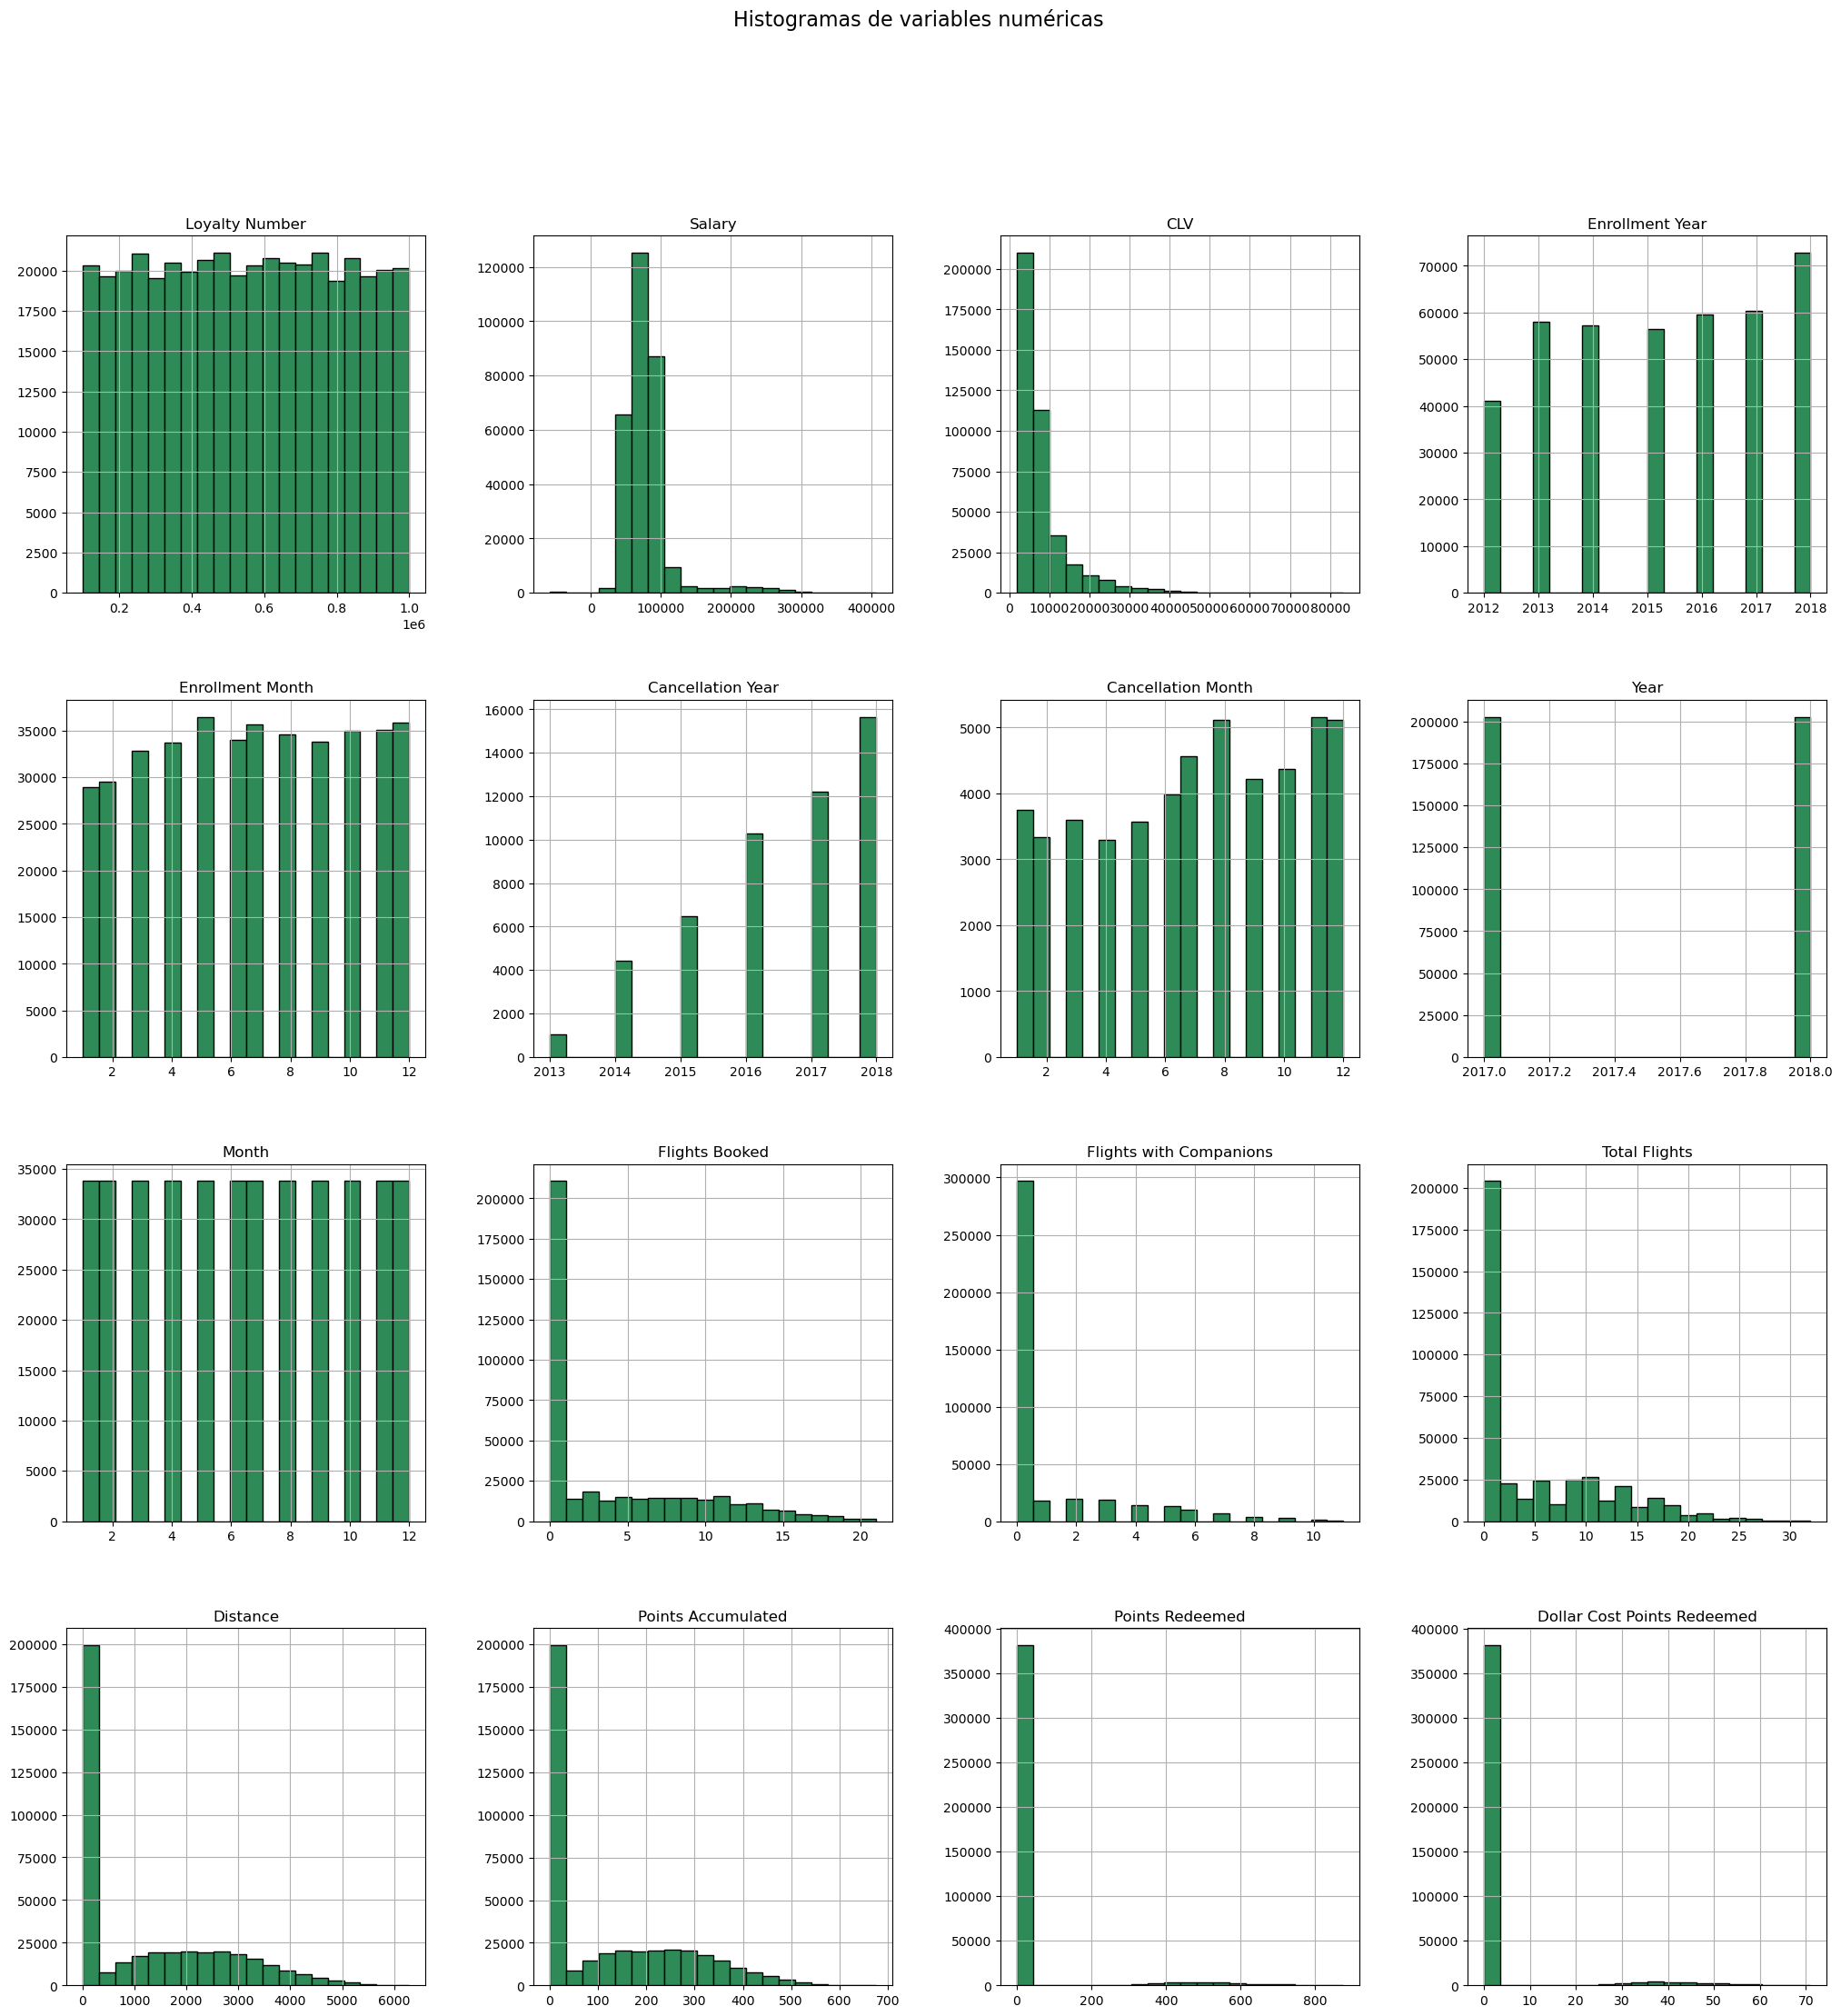


---------- BARRAS CATEGÓRICAS ----------


D:\Temp\ipykernel_11808\3646713937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_merged, palette=palette)


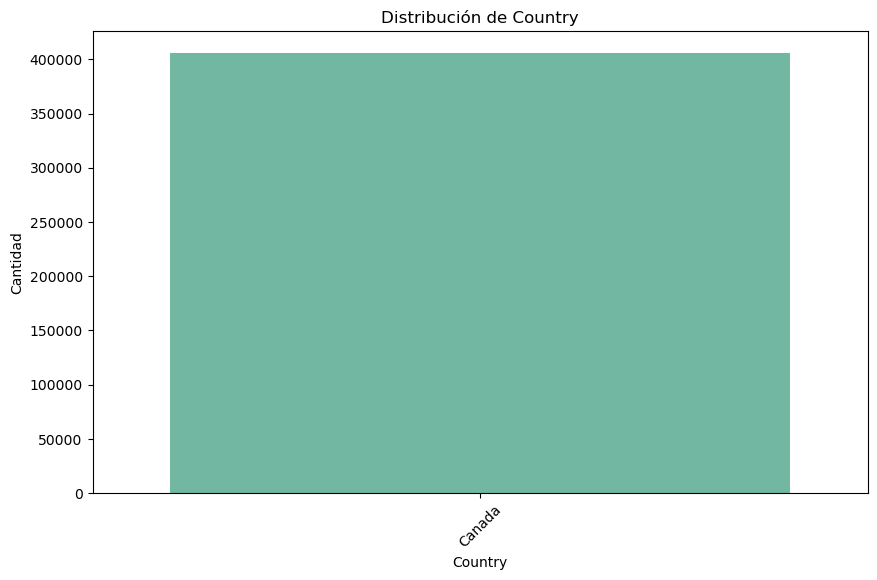

D:\Temp\ipykernel_11808\3646713937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_merged, palette=palette)


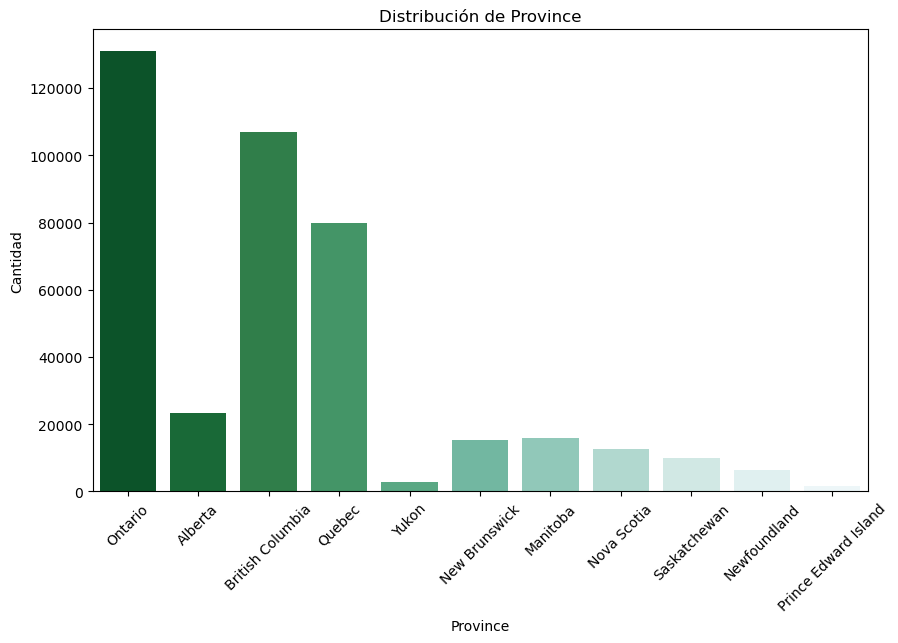

D:\Temp\ipykernel_11808\3646713937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_merged, palette=palette)


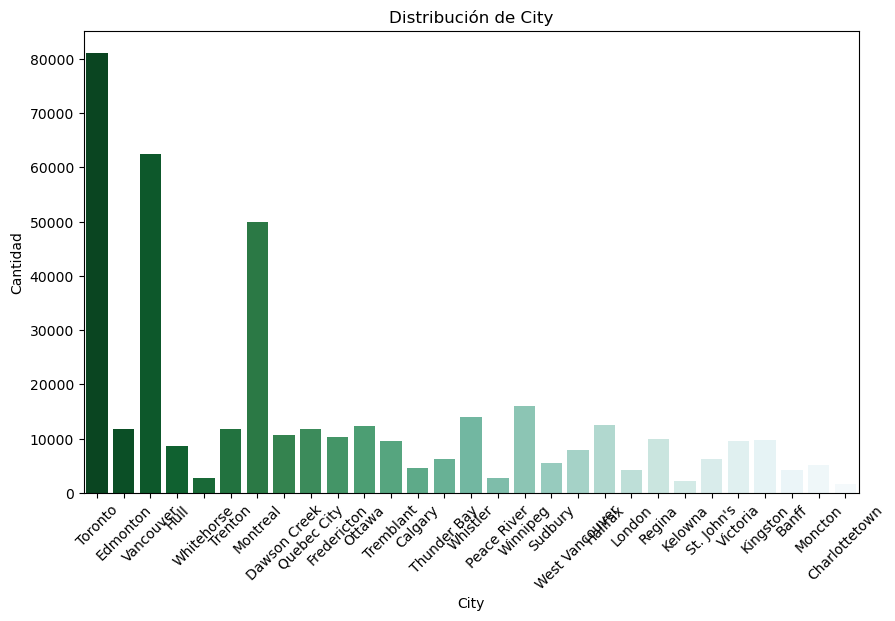

D:\Temp\ipykernel_11808\3646713937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_merged, palette=palette)


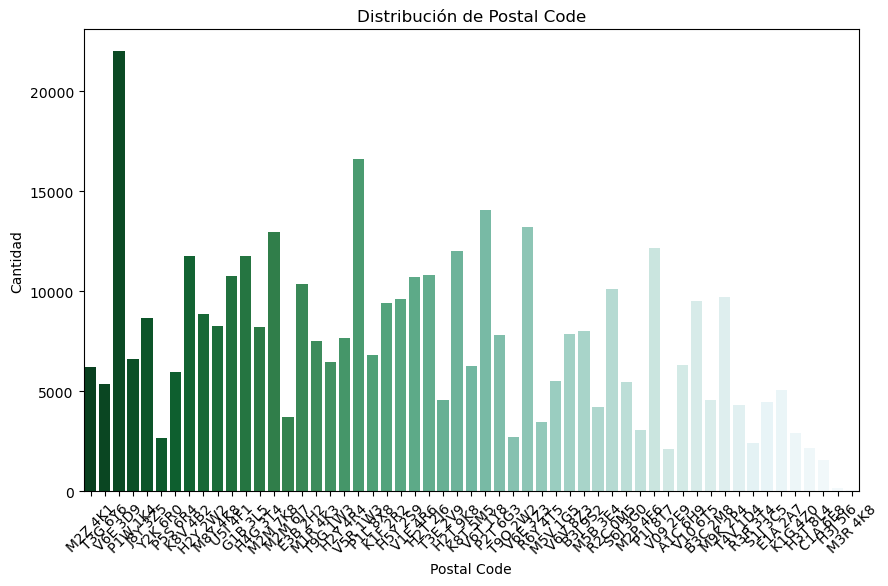

D:\Temp\ipykernel_11808\3646713937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_merged, palette=palette)


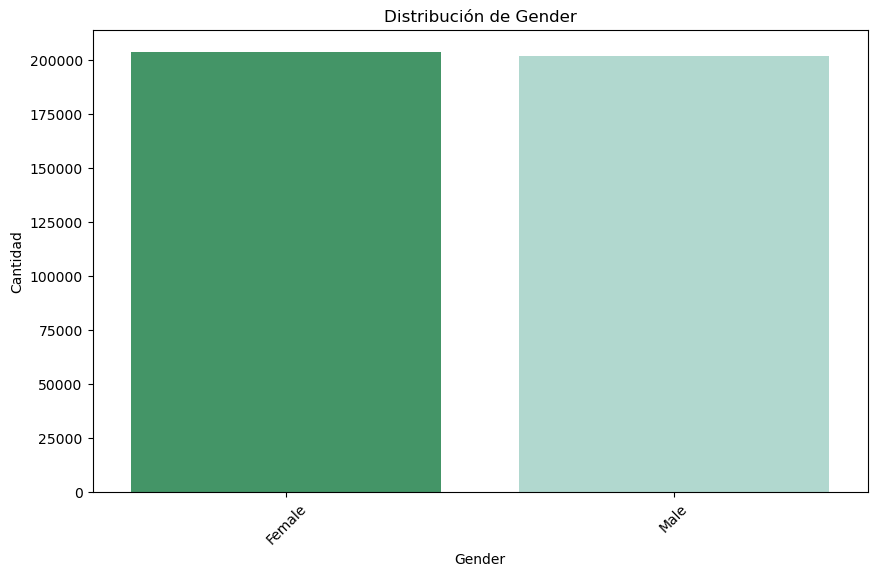

D:\Temp\ipykernel_11808\3646713937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_merged, palette=palette)


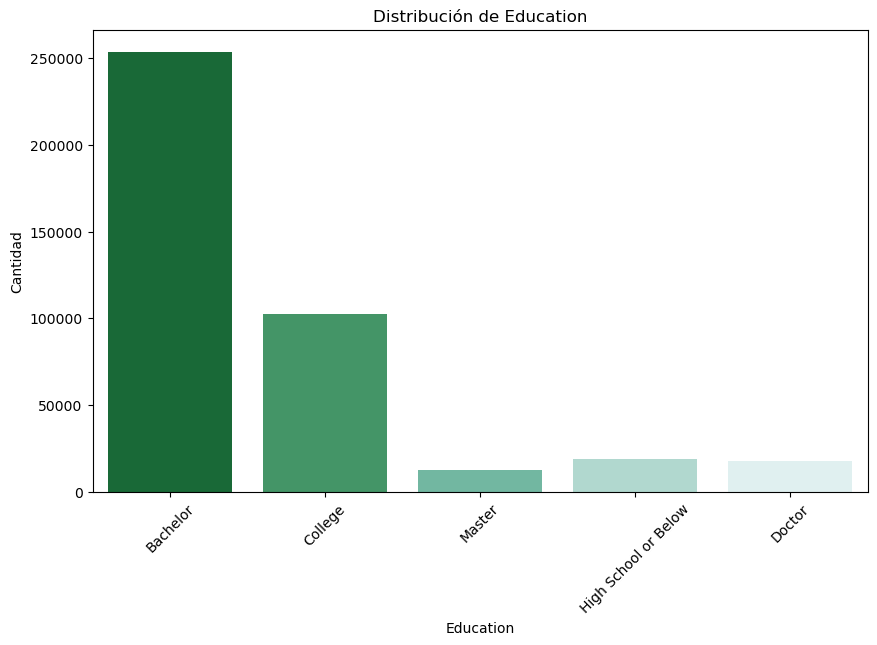

D:\Temp\ipykernel_11808\3646713937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_merged, palette=palette)


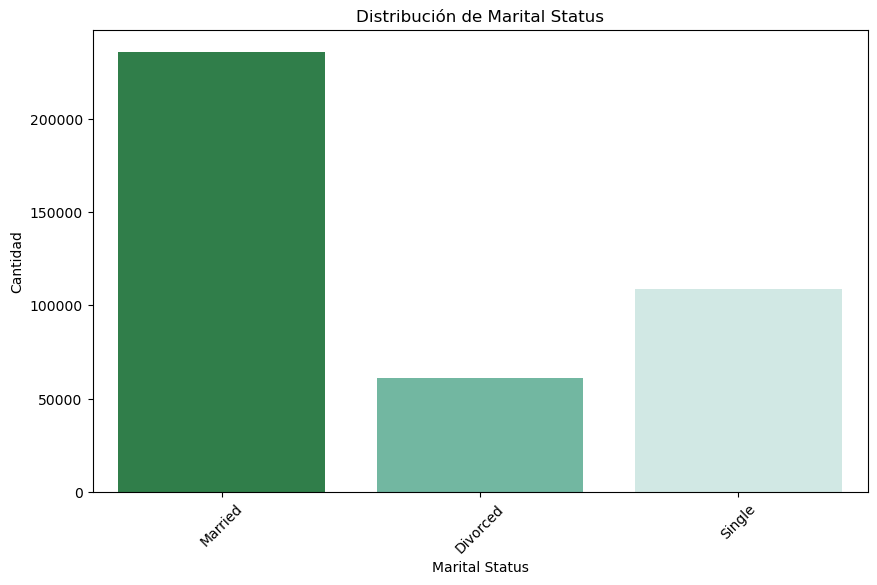

D:\Temp\ipykernel_11808\3646713937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_merged, palette=palette)


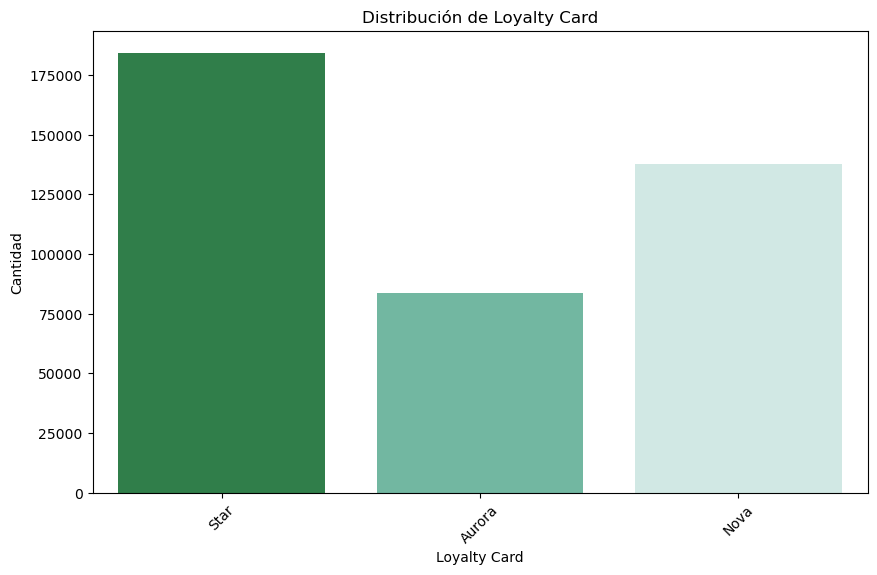

D:\Temp\ipykernel_11808\3646713937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_merged, palette=palette)


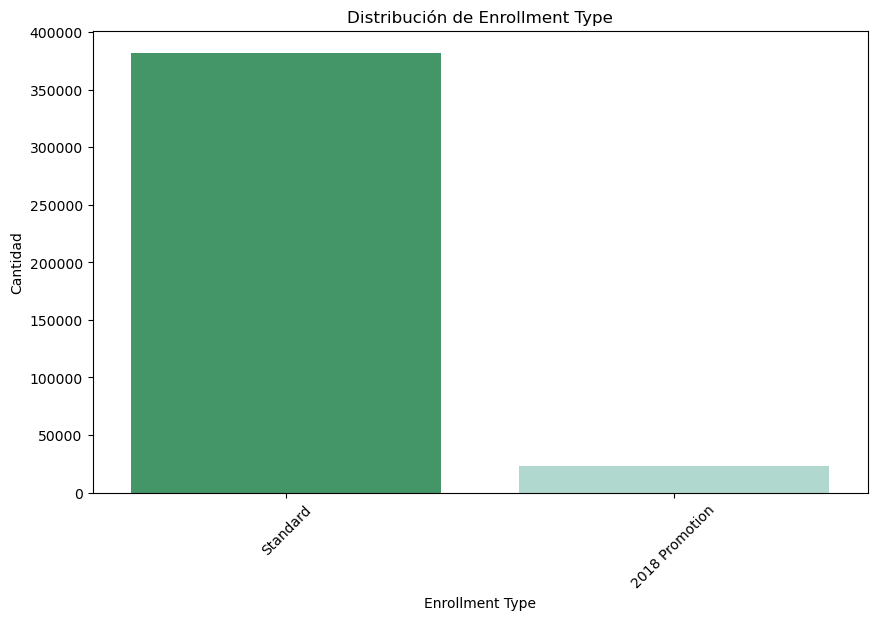

In [68]:
# 5. Exploración del DataFrame nuevo resultado de la unión. ESTA VA CON UNA FUNCIÓN MUY BONICA =)   =   EDA
# He decidido no poner: .dtypes (porque lo veo bien con .info())
# He dedicido no poner: .isnull() porque prefiero mirarlos después antes de empezar la gestión de nulos.

  
def explorar_df(df_merged, nombre="DataFrame"):
    
    print("Primeras filas del DataFrame:")
    display(df_merged.head())

    print("Información general del DataFrame:")
    df_merged.info()
    
    print("\n Tamaño del DataFrame: Cantidad de (filas, columnas):")
    print(df_merged.shape)
    
    print("\n Nombres de columnas:")
    for col in df_merged.columns:
        print(col)

    print("\n  DESCRIBE NUMÉRICO ")
    print(df_merged.describe().T) 

    print("\n DESCRIBE CATEGÓRICO (object/category)")
    print(df_merged.describe(include=["O"]).T)

    print("\n---------- HEAD ------------")
    print(df_merged.head())
    print("\n---------- TAIL ----------")
    print(df_merged.tail())
    print("\n---------- SAMPLE ----------")
    print(df_merged.sample())

    print("\n------- VALUE COUNTS (por columna categórica) -------")
    col_categoricas =  df_merged.select_dtypes(include=["object", "category"]).columns.tolist()

    for c in col_categoricas:
            print(df_merged[c].value_counts())            #Explora automáticamente todas las columnas categóricas del DataFrame y muestra sus valores y cuántas veces aparecen.

    print("\n---------- HISTOGRAMAS NUMÉRICOS ----------")
    # Histograma para todas las columnas numéricas
    num_cols = df_merged.select_dtypes(include=['int64','float64']).columns.tolist()
    df_merged[num_cols].hist(bins=20, figsize=(25,25), color='#2E8B57', edgecolor='black')  # verde-azulado
    plt.suptitle("Histogramas de variables numéricas", fontsize=16)
    plt.show()

    print("\n---------- BARRAS CATEGÓRICAS ----------")
    # Gráfico de barras para columnas categóricas con degradado azul-verde
    for c in col_categoricas:
        plt.figure(figsize=(10,6))
        # Paleta personalizada azul-verde
        palette = sns.color_palette("BuGn_r", n_colors=df_merged[c].nunique())
        sns.countplot(x=c, data=df_merged, palette=palette)
        plt.xticks(rotation=45)
        plt.xlabel(f"{c}")
        plt.ylabel("Cantidad")
        plt.title(f"Distribución de {c}")
        plt.show()

# Llamo a la función
explorar_df(df_merged, "df_merged")

------------------------------------------------
------------------------------------------------

## Ejercicio 

**2. Limpieza de Datos:**
   - Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
   - Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
   - Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

------------------------------------------------
------------------------------------------------

## **GESTIÓN DE NULOS** ##

**1. Identificamos los nulos en las columnas.**

**2. Diferenciación entre variables categóricas y numéricas de lso nulos.**

**3. Aplicación de estrategias dependiendo de distintos factores:**

## **1. Identificamos los nulos en las columnas.** ##

In [69]:
#1. Identificamos los nulos en las columnas y que me cree una tabla con los nombres de cada columna / nulos / % de nulos / tipo de dato de la columna.

# Crear tabla con nulos por columna
nulos_en_df_merged = (df_merged.isnull().sum().reset_index().rename(columns={"index": "columna", 0: "nulos"})
)

# Calcular porcentaje de nulos
nulos_en_df_merged["% nulos"] = (nulos_en_df_merged["nulos"] / len(df_merged) * 100).round(2)

# Añadir tipo de dato (dtype) de cada columna
nulos_en_df_merged["dtype"] = nulos_en_df_merged["columna"].map(df_merged.dtypes)

# Mostrar la tabla
nulos_en_df_merged

,columna,nulos,% nulos,dtype
0,Loyalty Number,0,0.00,int64
1,Country,0,0.00,object
2,Province,0,0.00,object
3,City,0,0.00,object
4,Postal Code,0,0.00,object
5,Gender,0,0.00,object
6,Education,0,0.00,object
7,Salary,102672,25.31,float64
8,Marital Status,0,0.00,object
9,Loyalty Card,0,0.00,object


## **2. Diferenciación entre variables categóricas y numéricas de los nulos.** ##

In [70]:
#2. Crear tabla con nulos por columna
nulos_en_df_merged = (df_merged.isnull().sum().reset_index().rename(columns={"index": "columna", 0: "nulos"}))

# Calcular porcentaje de nulos
nulos_en_df_merged["% nulos"] = (nulos_en_df_merged["nulos"] / len(df_merged) * 100).round(2)

# Añadir tipo de dato (dtype) de cada columna
nulos_en_df_merged["dtype"] = nulos_en_df_merged["columna"].map(df_merged.dtypes)

# Creo una nueva columna "tipo_variable" que etiqueta cada columna del DataFramen como categorica o numérica en caso contrario.  
nulos_en_df_merged["tipo_variable"] = nulos_en_df_merged["dtype"].apply(lambda x: "categórica" if x == "object" or str(x) == "category" else "numérica")

# Mostrar tabla completa
nulos_en_df_merged


,columna,nulos,% nulos,dtype,tipo_variable
0,Loyalty Number,0,0.00,int64,numérica
1,Country,0,0.00,object,categórica
2,Province,0,0.00,object,categórica
3,City,0,0.00,object,categórica
4,Postal Code,0,0.00,object,categórica
5,Gender,0,0.00,object,categórica
6,Education,0,0.00,object,categórica
7,Salary,102672,25.31,float64,numérica
8,Marital Status,0,0.00,object,categórica
9,Loyalty Card,0,0.00,object,categórica


In [71]:
# Listas de columnas categóricas y numéricas para verlas más claras
categoricas = nulos_en_df_merged[nulos_en_df_merged["tipo_variable"] == "categórica"]["columna"].tolist()
numericas = nulos_en_df_merged[nulos_en_df_merged["tipo_variable"] == "numérica"]["columna"].tolist()

print("Columnas categóricas:", categoricas)
print("\nColumnas numéricas:", numericas)


Columnas categóricas: ['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Marital Status', 'Loyalty Card', 'Enrollment Type']

Columnas numéricas: ['Loyalty Number', 'Salary', 'CLV', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']


## **3. Aplicación de estrategias dependiendo de distintos factores:** ##
   - Importancia de las variables dentro del análisis: ¿SE QUEDAN O SE VAN?

   **NOTA IMPORTANTE: Analicé columna por columna. En las columnas donde no pongo nada, es porque comprobado la cantidad de nulos/tipo de valor en relación al concepto que es e importancia de la columna concluyo que se va a MANTENER COMO ESTÁ, las demás son susceptibles de cambios y se indican bajo la columna a cambiar.** 


 **COLUMNAS CATEGORICAS:**
- **Country:** País de residencia del cliente.
- **Province:** Provincia o estado de residencia del cliente (aplicable a países con divisiones provinciales o estatales, como Canadá).
- **City:** Ciudad de residencia del cliente.
- **Postal Code:** Código postal del cliente.
- **Gender:** Género del cliente (ej. Male para masculino y Female para femenino).
- **Education:** Nivel educativo alcanzado por el cliente (ej. Bachelor para licenciatura, College para estudios universitarios o técnicos, etc.).
- **Marital Status:** Estado civil del cliente (ej. Single para soltero, Married para casado, Divorced para divorciado, etc.).
- **Loyalty Card:** Tipo de tarjeta de lealtad que posee el cliente. Esto podría indicar distintos niveles o categorías dentro del programa de lealtad.
- **Enrollment Type:** Tipo de inscripción del cliente en el programa de lealtad (ej. Standard).

**COLUMNAS NUMÉRICAS:**
- **`Loyalty Number:`** Este atributo representa un identificador único para cada cliente dentro del programa de lealtad de la aerolínea. Cada número de lealtad corresponde a un cliente específico.
    * MANTENER SIN CAMBIOS. es la ID. IMPORTANTE. No tiene nulos. El tipo de dato es correcto int64. (Porque indica un identificador de cliente)

- **`Salary:`** Ingreso anual estimado del cliente.
    * CAMBIO: SI. Con un 25 % de nulos en Salary, imputar con la mediana es generalmente una buena opción. Por qué: Puedo imputar sin perder demasiada información ni sesgar demasiado los resultados. La mediana representa el valor central y es más robusta.
    VERIFICAR: La distribución con un histograma. Si es sesgada imputar con mediana, ademmás es mas segura con nulos moderados. Y un 25% no son pocos.

- **`CLV (Customer Lifetime Value):`** Valor total estimado que el cliente aporta a la empresa durante toda la relación que mantiene con ella.
- **`Enrollment Year:`** Año en que el cliente se inscribió en el programa de lealtad. Y la columna **`Enrollment Month:`** Mes en que el cliente se inscribió en el programa de lealtad.
    * CAMBIO: Crear columna nueva uniendo ambas en: "Enrolmmnet_Date". De int64 a tipo DATETIPE, porque representan un año y un mes. No tienen nulos. 
    * BORRAR: Columnas anteriores: Enrollment Year y Enrollment Month.
    
- **`Cancellation Year:`** Año en que el cliente canceló su membresía en el programa de lealtad, si aplica. Y la columna **`Cancellation Month:`** Mes en que el cliente canceló su membresía en el programa de lealtad, si aplica.
    * CAMBIO: Crear columna nueva uniendo ambas en: "Cancellation_Date". De int64 a tipo DATETIPE, porque representan un año y un mes. Tiene un 86,66% de nulos ambas columnas, y además los nulos significan que no se han dado de baja,"si aplica" por lo que no voy a modificarlos a STR (porque primero pense que se podian poner como "ACTIVOS") pero es mejor modificarlos solo de float64 a int64 , ya que mantenerlos en números me permitirá seguir haciendo calculos numéricos. 
    * BORRAR: Columnas anteriores: Cancellation Year y Cancellation Month.
 - **Year:** Indica el año en el cual se registraron las actividades de vuelo para el cliente.
- **Month:** Representa el mes del año (de 1 a 12) en el cual ocurrieron las actividades de vuelo.
- **Flights Booked:** Número total de vuelos reservados por el cliente en ese mes específico.
- **Flights with Companions:** Número de vuelos reservados en los cuales el cliente viajó con acompañantes.
- **Total Flights:** El número total de vuelos que el cliente ha realizado.
- **Distance:** La distancia total (presumiblemente en millas o kilómetros) que el cliente ha volado durante el mes.
- **`Points Accumulated:`** Puntos acumulados por el cliente en el programa de lealtad durante el mes, con base en la distancia volada u otros factores.
    * Aunque es fload64 y a priori podría parecer que es mejor cambiarla a int64 porque son puntos,  he podido comprobar con un df_merged.sample() que viendo aleatoriamente numeros me han aparecido decimales y estaban redondeados a 2, asi que no la modifico. 
- **Points Redeemed:** Puntos que el cliente ha canjeado en el mes, posiblemente para obtener beneficios como vuelos gratis, mejoras, etc.
- **Dollar Cost Points Redeemed:** El valor en dólares de los puntos que el cliente ha redimido durante el mes.









In [72]:
# Enrollment Year y Enrollment Month:

# CAMBIO: Crear columna nueva uniendo ambas en: "Enrolmmnet_Date". De int64 a tipo DATETIPE, porque representan un año y una fecha. 
df_merged["Enrollment_Date"] = pd.to_datetime(
    df_merged["Enrollment Year"].astype(str) + "-" +
    df_merged["Enrollment Month"].astype(str) + "-01",
    format="%Y-%m-%d")

In [73]:
# BORRAR: Columnas anteriores: Enrollment Year y Enrollment Month. 
df_merged.drop(["Enrollment Year", "Enrollment Month"], axis=1, inplace=True)

df_merged 

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Enrollment_Date
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,NaN,NaN,2017,1,0,0,0,0,0.0,0,0,2016-02-01
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0,2016-02-01
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,NaN,NaN,2017,3,0,0,0,0,0.0,0,0,2016-02-01
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,NaN,NaN,2017,4,0,0,0,0,0.0,0,0,2016-02-01
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38,2016-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2016.0,8.0,2018,8,0,0,0,0,0.0,0,0,2015-12-01
405620,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2016.0,8.0,2018,9,0,0,0,0,0.0,0,0,2015-12-01
405621,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2016.0,8.0,2018,10,0,0,0,0,0.0,0,0,2015-12-01
405622,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2016.0,8.0,2018,11,0,0,0,0,0.0,0,0,2015-12-01


In [74]:
# Cancellation Year y Cancellation Month.

# CAMBIO: Crear columna nueva uniendo ambas en: "Cancellation_Date". De int64 a tipo DATETIPE, porque representan un año y una fecha. 
# Los nulos los mantenemos, sin modificarlos. Nos interesa que sigane stando en int64

# Definir la función
def crear_cancellation_date(row):
    if pd.isna(row["Cancellation Year"]) or pd.isna(row["Cancellation Month"]):
        return pd.NaT  # Mantener nulos
    return pd.Timestamp(year=int(row["Cancellation Year"]), month=int(row["Cancellation Month"]), day=1)

# Aplicar la función al DataFrame
df_merged["Cancellation_Date"] = df_merged.apply(crear_cancellation_date, axis=1)

# Comprobar el resultado
print(df_merged[["Cancellation Year", "Cancellation Month", "Cancellation_Date"]].head(10))
print(df_merged["Cancellation_Date"].dtype)


   Cancellation Year  Cancellation Month Cancellation_Date
0                NaN                 NaN               NaT
1                NaN                 NaN               NaT
2                NaN                 NaN               NaT
3                NaN                 NaN               NaT
4                NaN                 NaN               NaT
5                NaN                 NaN               NaT
6                NaN                 NaN               NaT
7                NaN                 NaN               NaT
8                NaN                 NaN               NaT
9                NaN                 NaN               NaT
datetime64[ns]


In [75]:
# BORRAR: Columnas anteriores: Cancellation Year, Cancellation Month. 
df_merged.drop(["Cancellation Year", "Cancellation Month"], axis=1, inplace=True)

df_merged 

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Enrollment_Date,Cancellation_Date
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2017,1,0,0,0,0,0.0,0,0,2016-02-01,NaT
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2017,2,3,0,3,2823,282.0,0,0,2016-02-01,NaT
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2017,3,0,0,0,0,0.0,0,0,2016-02-01,NaT
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2017,4,0,0,0,0,0.0,0,0,2016-02-01,NaT
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2018,10,6,2,8,3352,335.0,465,38,2016-02-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2018,8,0,0,0,0,0.0,0,0,2015-12-01,2016-08-01
405620,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2018,9,0,0,0,0,0.0,0,0,2015-12-01,2016-08-01
405621,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2018,10,0,0,0,0,0.0,0,0,2015-12-01,2016-08-01
405622,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2018,11,0,0,0,0,0.0,0,0,2015-12-01,2016-08-01


In [76]:
df_merged.isnull()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Enrollment_Date,Cancellation_Date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
405620,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
405621,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
405622,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [77]:
# Crear una nueva columna con la cantidad de nulos por fila
# Cantidad de nulos por columna
nulos_por_columna = df_merged.isnull().sum()

# Mostrar resultado
print(nulos_por_columna)

Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Enrollment_Date                     0
Cancellation_Date              355560
dtype: int64


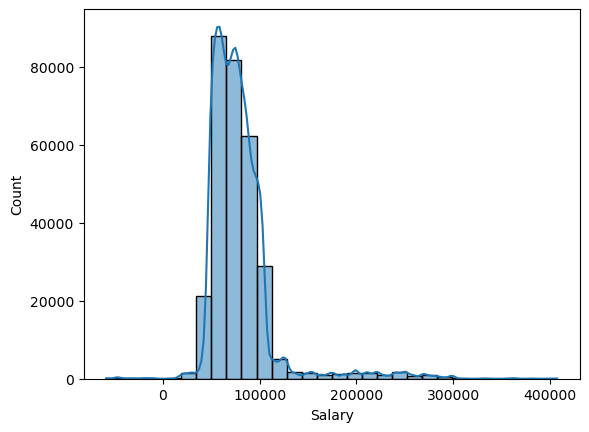

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_merged["Salary"], bins=30, kde=True)
plt.show()

#CONCLUSIÓN: Como esta centrada en varios valores utilizaré la mediana mara imputar los nulos en SALARY.

In [79]:
# Calcular mediana de Salary
median_salary = df_merged["Salary"].median()

# Reemplazar nulos con la mediana
df_merged["Salary"].fillna(median_salary, inplace=True)

# Verificar que no queden nulos
print(df_merged["Salary"].isnull().sum())

0


D:\Temp\ipykernel_11808\3861472339.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged["Salary"].fillna(median_salary, inplace=True)


In [80]:
# Contar nulos en la columna Salary
nulos = df_merged["Salary"].isnull().sum()

# Imprimir resultado
print(f"Nulos en Salary: {nulos}")

Nulos en Salary: 0


In [81]:
#COMPROBACIÓN DE LOS NULOS:
# NOTA: Como se puede comprobar la columna : Cancellation_Date tiene 355560 nulos. 
# Como indico en la explicación de columna por columna de arriba, esta columna esel resultado de la unión de dos columnas de mes y año, 
# pero he optado por no cambiar los nulos (aunque indiquen clientes activos en la membresia, es decir que a priori e podía cambiar a string) 
# sin embargo prefiero tenerlos en int64 porque me permitirá así poder hacer cálculos, de lo contrario perdería esa opción. 

df_merged.isnull().sum()

Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                              0
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Enrollment_Date                     0
Cancellation_Date              355560
dtype: int64

------------------------------------------------
------------------------------------------------

**Fase 2: Visualización**

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:  

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
3. ¿Cuál es la distribución de los clientes por provincia o estado?
4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? 
6. ¿Cómo se distribuyen los clientes según su estado civil y género?

------------------------------------------------
------------------------------------------------

## **1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?**  ##

Para visualizar la cantidad de vuelos reservados por mes durante el año, lo que queremos ver es: Variable numérica: Flights Booked y Variable categórica/temporal: Month

D:\Temp\ipykernel_11808\170688809.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


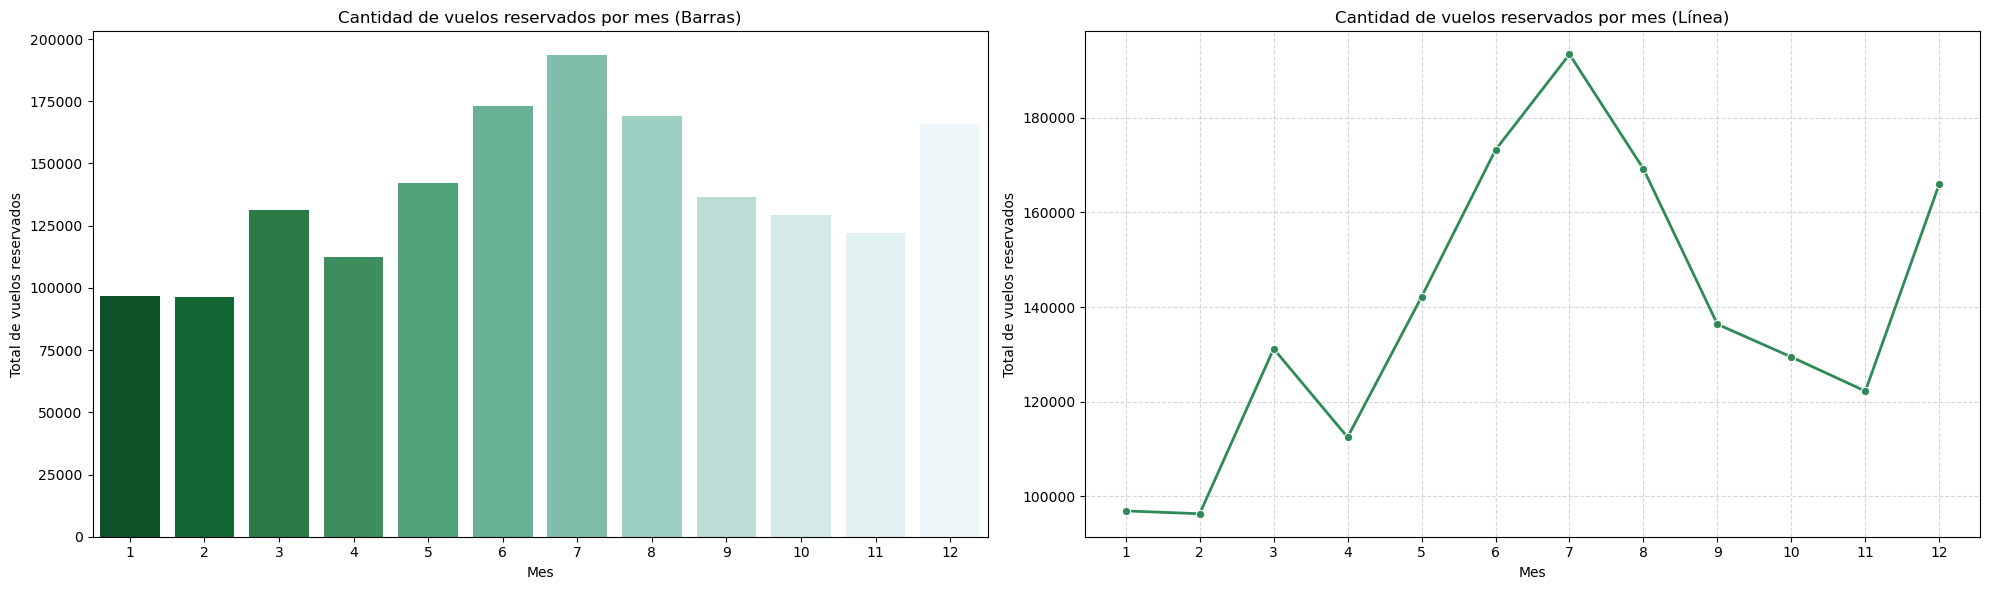

In [82]:
# Agrupar por mes y sumar vuelos reservados
monthly_flights = df_merged.groupby("Month")["Flights Booked"].sum().reset_index()

# Crear figura con dos subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(20,6))

# -------- Gráfico de barras --------
sns.barplot(
    x="Month",
    y="Flights Booked",
    data=monthly_flights,
    palette=sns.color_palette("BuGn_r", n_colors=12),  # degradado azul-verde
    ax=axes[0]
)
axes[0].set_title("Cantidad de vuelos reservados por mes (Barras)")
axes[0].set_xlabel("Mes")
axes[0].set_ylabel("Total de vuelos reservados")

# -------- Gráfico de línea con marcadores --------
sns.lineplot(
    x="Month",
    y="Flights Booked",
    data=monthly_flights,
    marker="o",
    color="#2E8B57",  # verde-azulado
    linewidth=2,
    ax=axes[1]
)
axes[1].set_title("Cantidad de vuelos reservados por mes (Línea)")
axes[1].set_xlabel("Mes")
axes[1].set_ylabel("Total de vuelos reservados")
axes[1].set_xticks(range(1,13))
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**CONCLUSIÓN:**
La gráfica muestra la cantidad de vuelos reservados por mes a lo largo del año. A partir de los datos visuales se pueden sacar loas siguientes conclusiones:
1. Los meses con más reservas son junio y julio, alcanzando el punto máximo en julio (alrededor de 200.000 vuelos reservados). Esto indica una clara temporada alta de verano.
2. Los meses con menos reservas son enero y febrero, con cifras cercanas a 100.000 reservas, lo que sugiere una temporada baja después de las fiestas.
3. A partir de marzo hasta julio, se objserva una tendencia creciente constante en las reservas.
4. Desde agosto en adelante, la cantidad de vuelos reservados comienza a descender gradualmente hasta diciembre, donde el nivel es intermedio.
5. En general, el gráfico muestra un patrón estacional claro: incremento de reservas en primavera-verano y disminución en otoño-invierno.

**Conclusión general**: La demanda de vuelos es marcadamente estacional, con su punto máximo en verano (junio-julio) y su punto mínimo a comienzos de año (enero-febrero).

## **2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?** ##

Aquí queremos visualizar la relación entre dos variables: Distance → distancia total volada (numérica) y Points Accumulated → puntos acumulados (numérica)

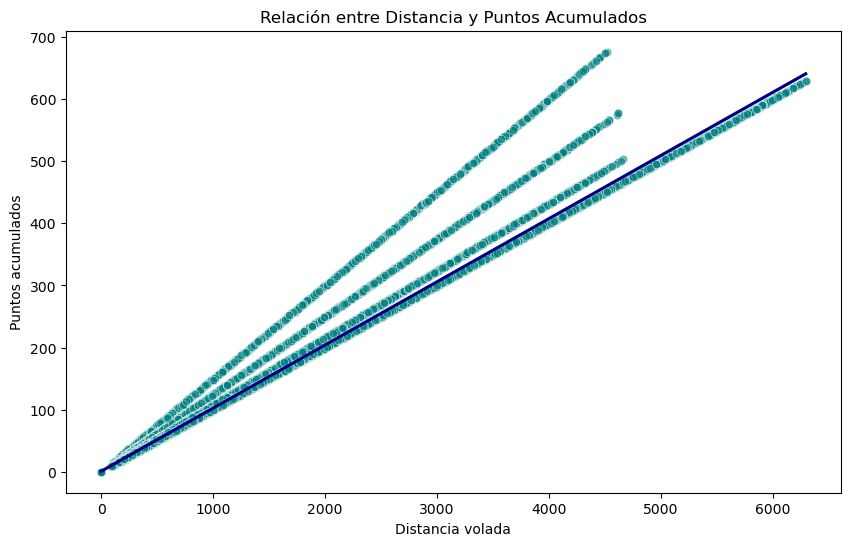

In [83]:
# ¿QUÉ HACE ESTE CÓDIGO? 
# Muestra cada registro como un punto (scatterplot) para ver la relación directa.
# Gráfico de barras con degradado azul-verde =)

plt.figure(figsize=(10,6))

# Scatter plot con linea de tendencia opcional
sns.scatterplot(
    x="Distance",
    y="Points Accumulated",
    data=df_merged,
    color="teal",   # un azul-verde uniforme
    alpha=0.6       # transparencia. # alpha=0.6 permite visualizar densidades si hay muchos puntos superpuestos.
)

# Opcional: añadir línea de regresión
sns.regplot(       # regplot añade una línea de tendencia para ver si hay correlación.
    x="Distance",
    y="Points Accumulated",
    data=df_merged,
    scatter=False,
    color="navy"
)

plt.title("Relación entre Distancia y Puntos Acumulados")
plt.xlabel("Distancia volada")
plt.ylabel("Puntos acumulados")
plt.show()


**CONCLUSIÓN:**
La gráfica muestra la relación entre la distancia volada y los puntos acumulados: 
1. Existe una relación positiva y proporcional entre la distancia volada y los puntos acumulados: a mayor distancia, mayor cantidad de puntos obtenidos.
2. Las líneas formadas por los puntos indican que probablemente existen distintas categórias o tarifas de vuelo.
3. Todas las líneas parten del mismo origen 0,0, lo que muestra que los puntos comienzan a acumularse únicamente cuando se realiza un vuelo.
4. La relación parece muy consistente y predecible, sin grandes desviaciones ni dispersiones, lo cual sugiere que el sistema de asignación de puntos es estable y depende principalmente de la distancia recorrida.

**Conclusión general:**
Los puntos acumulados aumentan proporcionalmente con la distancia volada, siguiendo una relación lineal clara. Es probable que existan diferentes escalas o categorías que influyen en la cantidad de puntos otorgados por kilómetro, pero la tendencia general demuestra que a más kilómetros volados, más puntos acumulan. 

## **3. ¿Cuál es la distribución de los clientes por provincia o estado?** ##

Aquí queremos visualizar la relación entre dos variables: Province (Queremos contar cuántos clientes hay en cada provincia)
TIPO DE GRÁFICO: Seaborn countplot → para mostrar conteo de registros por categoría.

NOTA: Como probablemente hay muchas provincias, conviene rotar etiquetas del eje X para que se lean.

D:\Temp\ipykernel_11808\2345729709.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


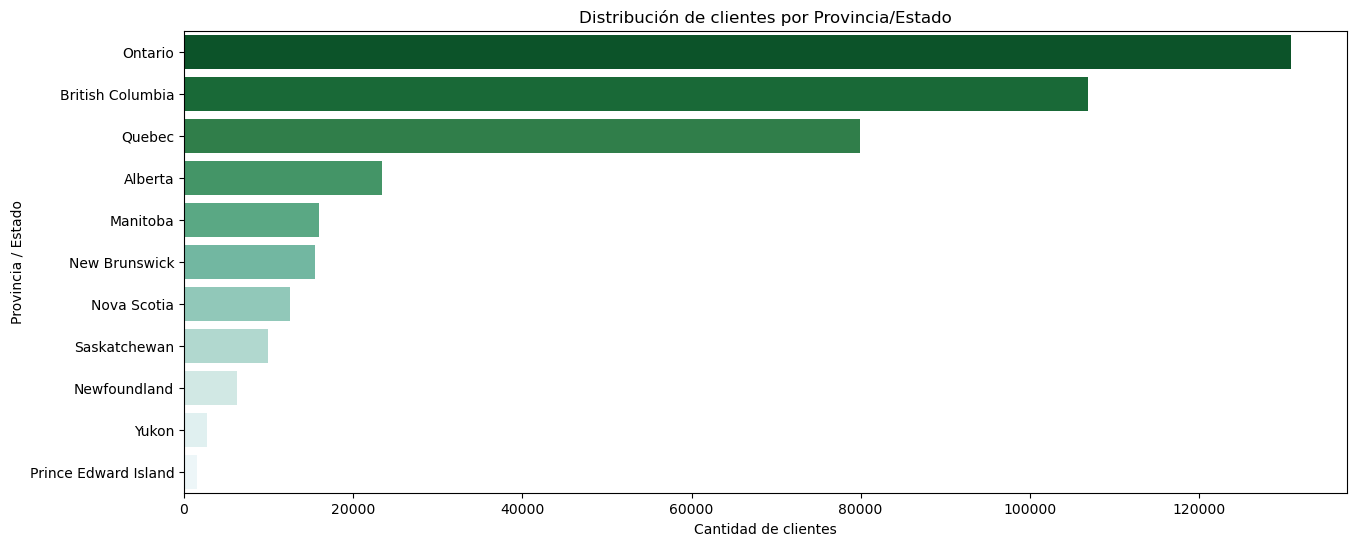

In [84]:
# ¿QUÉ HACE ESTE CÓDIGO?
# Cuenta cuántos clientes hay por provincia (countplot).
# Gráfico de barras con degradado azul-verde =)
# Ordena las provincias de mayor a menor número de clientes para que sea más intuitivo.
# Las etiquetas van en eje Y para evitar que se solapen si hay muchas provincias.

plt.figure(figsize=(15,6))

sns.countplot(
    y="Province",          # eje y para que las etiquetas se vean mejor
    data=df_merged,
    order=df_merged["Province"].value_counts().index,  # ordenar por cantidad
    palette=sns.color_palette("BuGn_r", n_colors=df_merged["Province"].nunique())
)

plt.title("Distribución de clientes por Provincia/Estado")
plt.xlabel("Cantidad de clientes")
plt.ylabel("Provincia / Estado")
plt.show()


**CONCLUSIÓN:**
La gráfica muestra la distribución de clientes por provincia o estado, representada mediante un gráfico de barras horizontales.
1. Ontario es la provincia con mayor cantidad de clientes, superando los 120.000, lo que la convierte en el principal mercado o zona de concentración de clientes.
2. Le siguien British Columbia y Quebec, también con cifras muy altas (entre 80.000 y 100.000), lo que indica que ests tres provincias concentran la mayor parte de la base de clientes.
3. Provincias como Alberta y Manitomba presentan una cantidad media de clientes, siendo mercados secundarios pero aún relevantes.
4. Las provincias de New Brunswick, Nova Scotia, Saskatchewan, Newfoundland, Yukon y Prince Edward Island tienen muchos menos clientes, representando solo una pequeña fracción del total. 
5. En conjunto,el gráfico evidencia una distribución desigual: unas pocas provincipas acumulan la mayoría de lso clientes, mientras que el resto tiene una presencia mucho menor.

**Conclusión general:**
La mayoría de los clientes se concentran en las provincias más grandes y pobladas -- especialmente Ontario, British Columbia y Quebec --, mientras que las provincias más pequeñas o menos densamente pobladas tienen una representación muy reducida. Esto sugiere que el mercado proncipal se encuentra claramente en el centro y oeste del país. 

## **4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?** ##

Aquí queremos visualizar la relación entre dos variable: Education (variable categórica) y Salary (Variable numérica)

Queremos comparar salario promedio por cada nivel educativo.

D:\Temp\ipykernel_11808\1003673604.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
D:\Temp\ipykernel_11808\1003673604.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


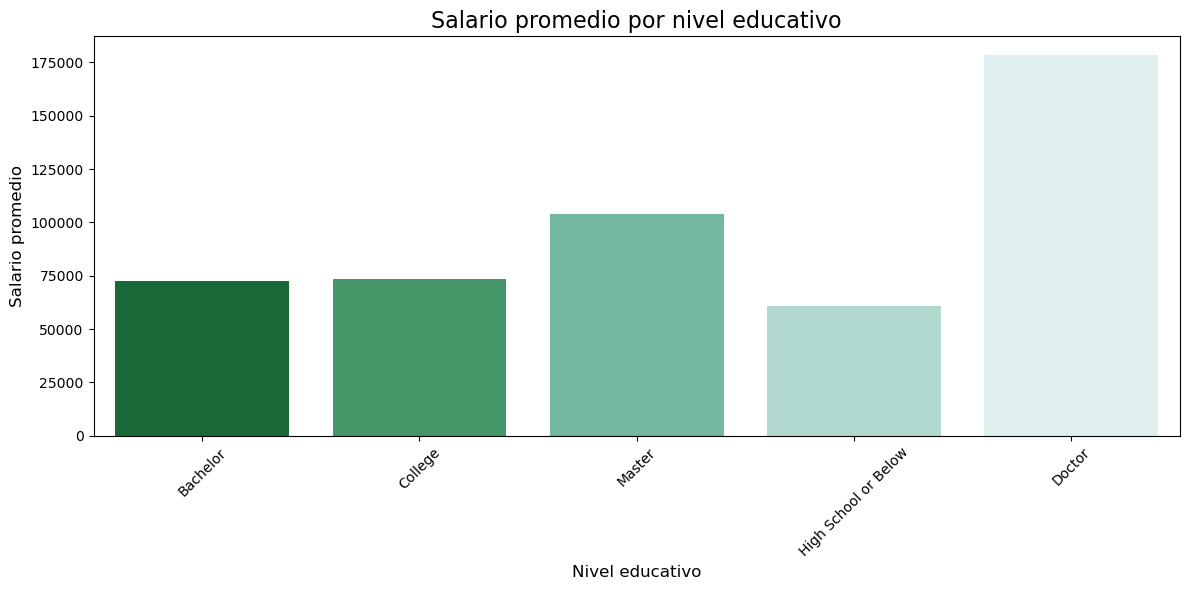

In [85]:
# ¿QUÉ HACE ESTE CÓDIGO?
# Muestra solo el promedio de salarios por nivel educativo. (Barplot)
# Gráfico de barras con degradado azul-verde =)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Barplot limpio sin barras de error
sns.barplot(
    x="Education",
    y="Salary",
    data=df_merged,
    palette=sns.color_palette("BuGn_r", n_colors=df_merged["Education"].nunique()),
    ci=None  # elimina las barras de error
)

plt.title("Salario promedio por nivel educativo", fontsize=16)
plt.xlabel("Nivel educativo", fontsize=12)
plt.ylabel("Salario promedio", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**CONCLUSIÓN:**
La gráfica muestra el salario promedio anual, en función de cinco niveles educativos distintos.

1. El nivel educativo de Doctor (Doctor) presenta el salario promedio más alto, superando las 175.000, lo que lo establece como el máximo absoluto.

2. El nivel educativo "High School or Below" (Escuela Secundaria o Inferior) tiene el salario promedio más bajo, con una cifra cercana a las 62.500.

3. El nivel de Maestría (Master) representa el segundo salario promedio más alto, alcanzando aproximadamente las 105.000.

4. Los niveles de Licenciatura (Bachelor) y Técnico/Grado Superior (College) tienen salarios promedio casi idénticos y se encuentran en un rango intermedio, cerca de las 75.000.

En general, existe una correlación positiva y progresiva entre el nivel de educación y el salario promedio, donde cada aumento en el grado académico (con la excepción de Bachelor y College) se traduce en un incremento significativo en la remuneración.

**Conclusión general:**
El salario promedio está fuertemente influenciado por el nivel educativo, mostrando una clara tendencia ascendente que culmina con los salarios más altos para quienes poseen un grado de Doctor.

## **5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?** ##
Aquí queremos visualizar la relación entre clientes con la variable: Loyalty Card. Queremos ver proporciones.

“Como la variable es categórica y nos interesa proporción de cada tipo de tarjeta, un gráfico circular o de barras permite ver de forma rápida qué tipo de tarjeta es más común y comparar categorías visualmente.”

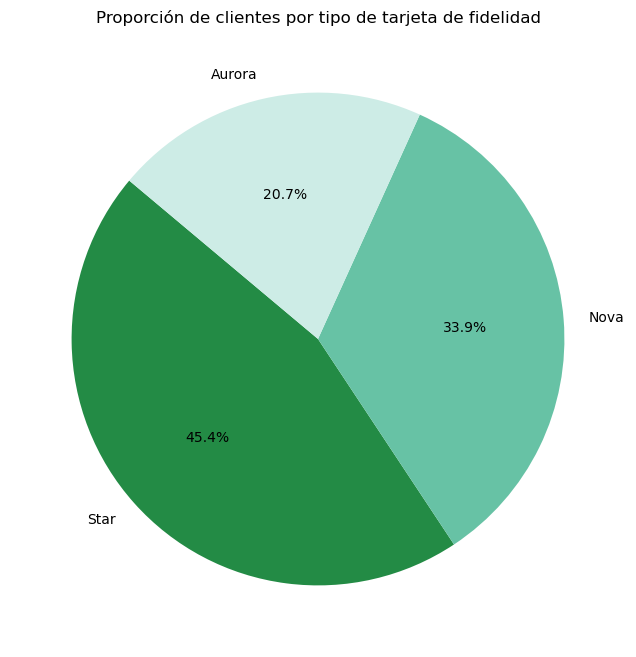

In [86]:
# ¿QUÉ HACE ESTE CÓDIGO? 
# Muestra los tres tipos de datos de la variable Loyalty Card. (Countplot)
# Gráfico de barras con degradado azul-verde =)

proporciones = df_merged["Loyalty Card"].value_counts()  # Muestra lis tres tipos de datos de la variable Loyalty Card.
colores = sns.color_palette("BuGn_r", n_colors=len(proporciones))

plt.figure(figsize=(8,8))
plt.pie(
    proporciones,
    labels=proporciones.index,
    autopct='%1.1f%%',
    colors=colores,
    startangle=140
)
plt.title("Proporción de clientes por tipo de tarjeta de fidelidad")
plt.show()


**CONCLUSIÓN:**
La gráfica muestra la distribución porcentual de clientes entre tres tipos de tarjetas de fidelidad (Star, Nova y Aurora).

1. El tipo de tarjeta Star es la más popular, representando la mayor proporción de clientes con un 45.4% del total. Esto la posiciona como la categoría dominante.

2. El tipo de tarjeta Aurora tiene la menor proporción de clientes, con solo un 20.7%. Esto indica que es la tarjeta de fidelidad menos común entre los clientes.

3. El tipo de tarjeta Nova ocupa una posición intermedia, abarcando un 33.9% de la base de clientes.

4. La suma de las dos categorías menores (Nova y Aurora: 33.9%+20.7%=54.6%) apenas supera la proporción de la tarjeta dominante (Star: 45.4%).

En general, el gráfico muestra una distribución desigual de los clientes, donde la tarjeta Star atrae a casi la mitad de la base de clientes de fidelidad, mientras que la tarjeta Aurora es significativamente menos popular.

**Conclusión general:**
La gran mayoría de los clientes de fidelidad se concentran en las categorías Star y Nova, siendo Star el principal motor de participación en el programa de fidelidad.

## **6. ¿Cómo se distribuyen los clientes según su estado civil y género?** ##
Aquí queremos visualizar la relación entre dos variables categoricas: Marital Status y Gender 

<Axes: xlabel='Gender', ylabel='Marital Status'>

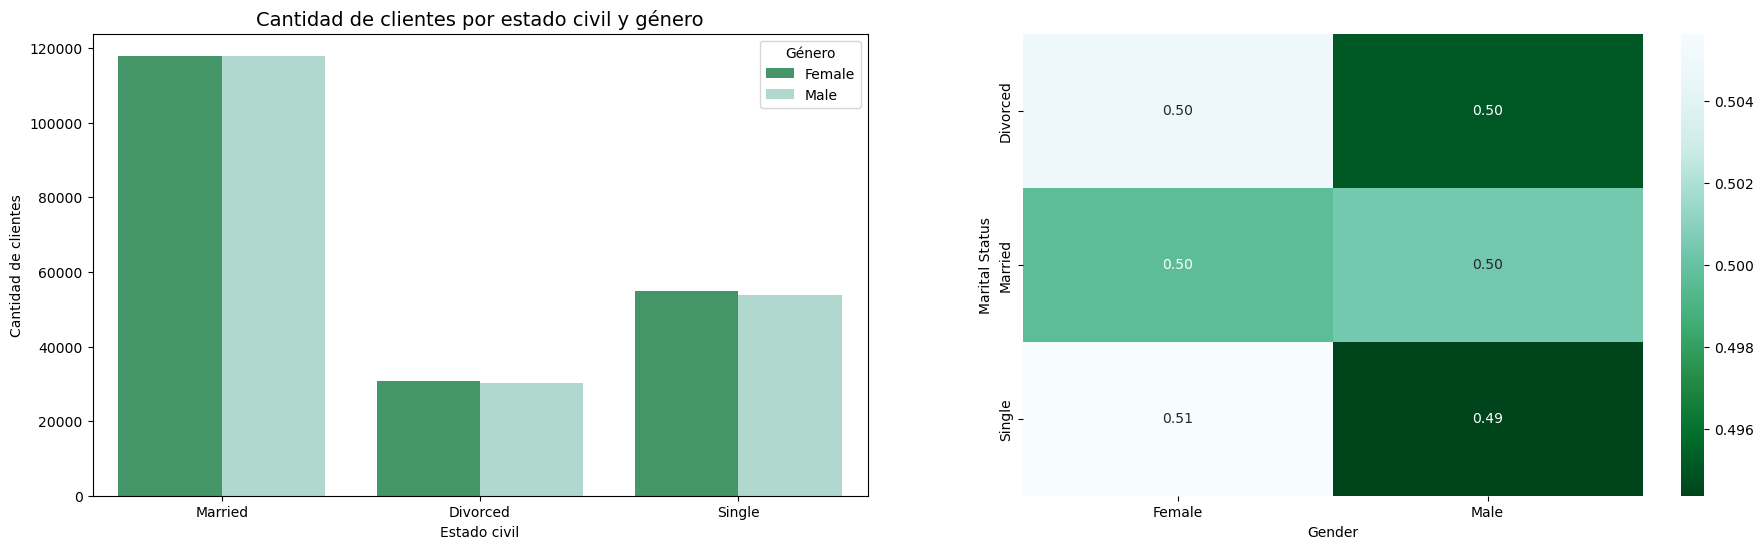

In [87]:
# ¿QUÉ HACE ESTE CÓDIGO? 

# Crear tabla de contingencia para heatmap
tabla = pd.crosstab(df_merged["Marital Status"], df_merged["Gender"])
tabla_prop = tabla.div(tabla.sum(axis=1), axis=0)  # proporción por fila

# Figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(22,6))

# -------- Countplot --------
sns.countplot(
    x="Marital Status",
    hue="Gender",
    data=df_merged,
    palette=sns.color_palette("BuGn_r", n_colors=2),
    ax=axes[0]
)
axes[0].set_title("Cantidad de clientes por estado civil y género", fontsize=14)
axes[0].set_xlabel("Estado civil")
axes[0].set_ylabel("Cantidad de clientes")
axes[0].legend(title="Género")

# -------- Heatmap --------
sns.heatmap(
    tabla_prop,
    annot=True,
    fmt=".2f",
    cmap="BuGn_r",
    ax=axes[1]
)


**CONCLUSIÓN:**
El análisis se basa en dos visualizaciones distintas (gráfico de barras y gráfico de calor) que representan la misma información sobre la base de clientes.

Análisis del Gráfico de Barras (Cantidad Absoluta)
1. La categoría "Married" (Casado/a) es, por mucho, la más grande, con un total de clientes que supera las 115.000 personas.

2. Dentro de la categoría "Married", la distribución entre géneros es casi perfectamente equitativa, aunque el género "Female" (Mujer) es ligeramente dominante, superando ligeramente al género "Male" (Hombre).

3. La categoría "Divorced" (Divorciado/a) tiene el menor número de clientes, con aproximadamente 30.000 personas en total.

4. La categoría "Single" (Soltero/a) es la segunda más grande, con cerca de 55.000 clientes.

En general, el volumen de clientes es significativamente más alto en el estado civil de casado/a, y la distribución por género es muy equilibrada en las tres categorías.

Análisis del Gráfico de Calor (Proporción Relativa)
1. El género "Female" (Mujer) tiene una ligera predominancia de 0.51 (51%) en la categoría "Single" (Soltero/a), mientras que el género "Male" tiene un 0.49 (49%).

2. En las categorías "Married" (Casado/a) y "Divorced" (Divorciado/a), la proporción de clientes es exactamente 0.50 (50%) para ambos géneros, lo que confirma una paridad perfecta dentro de esos estados civiles.

3. La escala de color (a la derecha) refuerza que la distribución de clientes está muy cerca del 0.50, indicando que las diferencias de género son mínimas o inexistentes en la mayoría de los casos.

**Conclusión general:** 

El mercado objetivo más grande es el de clientes casados, superando a las otras dos categorías combinadas. La segmentación de la base de clientes es notablemente neutra en cuanto al género, ya que la proporción de hombres y mujeres es casi idéntica en los tres estados civiles.

------------------------------------------------
------------------------------------------------

### BONUS Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando el conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Tendremos en mente que los datos que tenemos son solo una muestra de una población. Para ello, los pasos que deberás seguir son: 

1. **Preparación de Datos:**
Filtrar el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

2. **Análisis Descriptivo:**
Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, mediana, la desviación estándar) del número de vuelos reservados para cada grupo. Aquí, utilizamos estadística descriptiva normal.

3. **Prueba Estadística:**
Realizar una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos. Aquí utilizamos estadística inferencial.

------------------------------------------------
------------------------------------------------

## **1. Preparación de Datos:** ## 
**Filtrar el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.** 

In [88]:
# Filtrar columnas relevantes
nuevo_dataframe = df_merged[['Flights Booked', 'Education']].copy()


# Mostrar las primeras filas para comprobar
nuevo_dataframe.head(200)

,Flights Booked,Education
0,0,Bachelor
1,3,Bachelor
2,0,Bachelor
3,0,Bachelor
4,6,Bachelor
...,...,...
195,9,Bachelor
196,7,Bachelor
197,17,Bachelor
198,8,Bachelor


## **2. Análisis Descriptivo:**  ##

**Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, mediana, la desviación estándar) del número de vuelos reservados para cada grupo. Aquí, utilizamos estadística descriptiva normal.**

In [89]:
# Agrupar por nivel educativo y calcular estadísticas descriptivas
estadisticas_educacion = nuevo_dataframe.groupby("Education")["Flights Booked"].agg(count="count", mean="mean", median="median", std="std", min="min", max="max").reset_index()

estadisticas_educacion


,Education,count,mean,median,std,min,max
0,Bachelor,253752,4.091093,1.0,5.216995,0,21
1,College,102672,4.153012,1.0,5.242136,0,21
2,Doctor,17856,4.146281,1.0,5.250093,0,21
3,High School or Below,19008,4.155777,1.0,5.234551,0,21
4,Master,12336,4.184014,1.0,5.210294,0,21


## 3. **Prueba Estadística:** ##
**Realizar una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos. Aquí utilizamos estadística inferencial.**

Variable dependiente: Flights Booked. Variable independiente: Education
Queremos saber si los clientes con diferentes niveles educativos reservan una cantidad distinta de vuelos, en promedio.


## **Pasos** ##

**Formulación de la hipótesis**:
- H0 (Hipótesis nula) No existen diferencias significativas en el número de vuelos reservados entre los distintos niveles educativos. Es decir, la media de Flights Booked es igual para todos los grupos de Education.
- H1 (Hipótesis alternativa) Existen diferencias significativas en el número de vuelos reservados entre al menos dos niveles educativos. Es decir, al menos un grupo educativo tiene una media distinta de los demás.

**1. Calculo la MEDIA de Flights Booked**   
- He hecho una gráfica para ver si a simple vista se concentran más clientes en algún punto. 

**2. Después calculo la DESVIACIÓN ESTANDAR del número de vuelos que han reservados.**

**3. Calculo el INTERVALO DE CONFIANA de mi muestra.**

**4. Paso el test de NORMALIZACIÓN** **Selección de la prueba estadística**

**5. Creo máscaras para cada valor distinto dentro de Education** con el fin de poder hacer la comparativa entre subgrupos. **Interpretación de resultados**


In [90]:
#Voy a comprobar los valores de Education para saber que están correctos y no hay nada confuso en los datos. 
df_merged['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [91]:
#Voy a comprobar los valores de Education para saber que están correctos y no hay nada confuso en los datos. 
df_merged['Flights Booked'].unique()

array([ 0,  3,  6, 13, 12,  8, 14,  2,  1,  7, 15,  4,  9, 16, 11,  5, 10,
       17, 18, 19, 20, 21])

In [92]:
# 1. Primero calcular la MEDIA de Flights Booked
media_reserva_vuelos = df_merged['Flights Booked'].mean().round(2)
media_reserva_vuelos

np.float64(4.12)

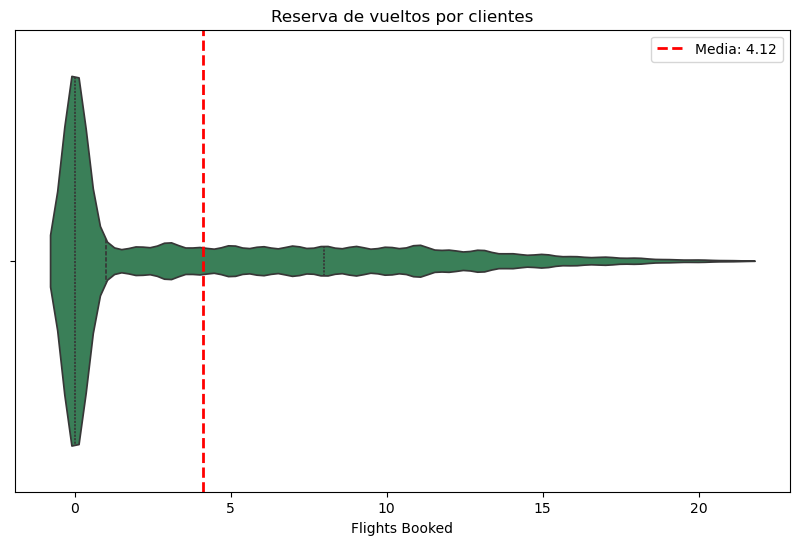

In [95]:
# Una gráfica para ver si hay datos que se salen de la media.

# Violin plot
plt.figure(figsize=(10,6))
sns.violinplot(x=df_merged['Flights Booked'], inner="quartile", color="#2E8B57")  # verde azulado
plt.axvline(media_reserva_vuelos, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_reserva_vuelos}')
plt.title("Reserva de vueltos por clientes")
plt.xlabel("Flights Booked")
plt.legend()
plt.show()


**CONCLUSIÓN**

La gráfica muestra la distribución de la cantidad de vuelos que cada cliente ha reservado.
Esta gráfica presenta la distribución de vuelos reservados por clientes, utilizando un gráfico de violín, que combina la información de un box plot (diagrama de caja) con la densidad de la distribución.

Concentración Principal: Existe una altísima concentración de clientes que han reservado un número muy bajo de vuelos, específicamente entre 0 y 1 vuelo. Esto se evidencia por el "cuerpo" muy ancho del violín cerca del eje vertical (x=0).

La gran mayoría de la población de clientes son viajeros ocasionales o de una sola vez.

Distribución Asimétrica: La distribución es marcadamente asimétrica positiva (o sesgada a la derecha). Esto significa que la "cola" de la distribución se extiende mucho más hacia la derecha, indicando la presencia de un pequeño grupo de clientes que han reservado un número significativamente mayor de vuelos (hasta más de 20).

Valor de la Media: La media de vuelos reservados es de 4.12 (marcada por la línea roja discontinua). Dado el fuerte sesgo de la distribución, este valor de la media es arrastrado hacia la derecha por los clientes con muchas reservas y no es el valor más representativo del cliente típico.

Comparación de Medidas: Debido a la alta concentración en 0-1 vuelo, es muy probable que la mediana (el 50% de los datos) y la moda (el valor más frecuente) sean mucho menores que la media de 4.12. 

**Conclusión General:**
La clientela se compone mayoritariamente de viajeros de muy baja frecuencia (casi todos reservan 0 o 1 vuelo), aunque existe un pequeño segmento de clientes muy frecuentes que reserva muchos más vuelos. Este pequeño grupo eleva significativamente el promedio total de reservas.

In [96]:
# 2. Después calculo la DESVIACIÓN ESTANDAR del número de vuelos que han reservados.
# Desviación estándar de Flights Booked
std_vuelos = df_merged['Flights Booked'].std()
print(std_vuelos)


5.225518362156746


In [98]:
# 3. Calcula el INTERVALO DE CONFIANZA
from scipy import stats

# Tamaño de la muestra
n = len(df_merged['Flights Booked'])

# Intervalo de confianza 95%
intervalo_confianza = stats.t.interval(
    confidence=0.95,
    df=n-1,
    loc=media_reserva_vuelos,
    scale=std_vuelos / np.sqrt(n)
)

intervalo_confianza

(np.float64(4.10391885590775), np.float64(4.13608114409225))

In [99]:
# 4. Pasé el test de normalización.

def prueba_hipotesis(*args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versión de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney

    Parámetros:
    *args: listas o arrays con los datos de cada grupo. Espera DOS grupos a comparar

    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis.
    """
     # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50: #aquí vamos a decidir hacer komogorov porque es más potente y shapiro solo en muestras pequeñas
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales, all() solo devuelve True si todos los elementos son True

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0. Es decir, sí hay diferencias significativas)" if p_valor < alfa else "No se rechaza H0. Es decir, no hay diferencias significativas)"
    }

# Imprimir resultados de manera más clara
    print("\n ** 📊 Resultados de la Prueba de Hipótesis**")
    print(f" Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f" Normalidad por grupo: {normalidad}")
    print(f" Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f" Test aplicado: {test_usado}")
    print(f"Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f" Conclusión: {resultado['Conclusión']}\n")



In [106]:
#Aquí puedo recordar los valores únicos de Education 
df_merged['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [101]:
# 5. Crear máscaras para cada grupo. Aquí estoy diviendo mi conjunto de datos en varios subconjuntos para después poder comparar
# cada dos grupos para ver el resultado de la prueba hipótesis = análisis comparativo entre grupos.

bachelor = df_merged[df_merged['Education'] == 'Bachelor']["Flights Booked"]
college = df_merged[df_merged['Education'] == 'College']["Flights Booked"]
master = df_merged[df_merged['Education'] == 'Master']["Flights Booked"]
hs = df_merged[df_merged['Education'] == 'High School or Below']["Flights Booked"]
dr = df_merged[df_merged['Education'] == 'Doctor']["Flights Booked"]

In [102]:
# 6. Aquí estoy comparando dos de los grupos contenidos en Education. 
prueba_hipotesis(bachelor, master)


 ** 📊 Resultados de la Prueba de Hipótesis**
 Test de Normalidad: No
 Normalidad por grupo: [np.False_, np.False_]
 Test de Varianza: Iguales (p = 0.1068)
 Test aplicado: Mann-Whitney U
Estadístico: 1545385275.5000, p-valor: 0.0116
 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas)



# **EXTRA:** ##   Estaba trasteando. Pero me parece interesante hacer algo así. 

Se me ocurrió que para ir comparando de dos en dos muestras, hacer una tabla con los valores unicos de Education recordandote cuales son las combinaciones posibles entre ellas puede estar bien para luego ver la que quieras en la Prueba Hipótesis. Como curiosidad me pareció interesante. 



In [118]:
# Esto te da todas las combinaciones posibles de 2 elementos sin repeticiones y sin importar el orden.

from itertools import combinations

# Lista de tus valores únicos
education_unique = ['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor']

# Generar todas las combinaciones posibles de 2 en 2
combs_2 = list(combinations(education_levels, 2))

# Convertir a DataFrame para mostrar como tabla
df_combs = pd.DataFrame(combs_2, columns=['Education_1', 'Education_2'])
print(df_combs)

            Education_1           Education_2
0              Bachelor               College
1              Bachelor                Master
2              Bachelor  High School or Below
3              Bachelor                Doctor
4               College                Master
5               College  High School or Below
6               College                Doctor
7                Master  High School or Below
8                Master                Doctor
9  High School or Below                Doctor


In [120]:
# Aqui crear una función con idea de que haga todas las Pruebas de Hipótesis de todas las combinaciones posibles que hemos sacado arriba de Education. 


# Lista de tus valores únicos
education_unique = ['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor']

# Generar todas las combinaciones posibles de 2 en 2
combs_2 = list(combinations(education_levels, 2))

def prueba_hipotesis_detallada(df, grupo1, grupo2, columna='Flights Booked'):
    """
    Realiza una prueba de hipótesis robusta entre dos grupos.
    Devuelve un diccionario con el resultado formateado.
    """
    data1 = df[df['Education'] == grupo1][columna]
    data2 = df[df['Education'] == grupo2][columna]
    
    # Test de normalidad (Shapiro)
    normal1 = stats.shapiro(data1)[1] > 0.05
    normal2 = stats.shapiro(data2)[1] > 0.05
    normalidad = normal1 and normal2
    
    # Test de igualdad de varianzas (Levene)
    levene_stat, levene_p = stats.levene(data1, data2)
    varianzas_iguales = levene_p > 0.05
    
    # Decidir test
    if normalidad and varianzas_iguales:
        test_aplicado = "t-test independiente"
        stat, p_value = stats.ttest_ind(data1, data2)
    else:
        test_aplicado = "Mann-Whitney U"
        stat, p_value = stats.mannwhitneyu(data1, data2)
    
    # Conclusión
    conclusion = "Rechazamos H0. Es decir, sí hay diferencias significativas" if p_value < 0.05 else "No rechazamos H0. No hay diferencias significativas"
    
    resultado = f"""
📊 Resultados de la Prueba de Hipótesis
Test de Normalidad: {'Sí' if normalidad else 'No'}
Normalidad por grupo: {[normal1, normal2]}
Test de Varianza: {'Iguales' if varianzas_iguales else 'Diferentes'} (p = {levene_p:.4f})
Test aplicado: {test_aplicado}
Estadístico: {stat:.4f}, p-valor: {p_value:.4f}
Conclusión: {conclusion}
"""
    
    return {'Education': f"{grupo1} vs {grupo2}", columna: resultado}

# Función para generar resultados de todas las combinaciones
def resultados_todas_combinaciones(df, combinaciones, columna='Flights Booked'):
    resultados = []
    for g1, g2 in combinaciones:
        resultados.append(prueba_hipotesis_detallada(df, g1, g2, columna))
    return pd.DataFrame(resultados)

# Ejecutar la función
df_resultados = resultados_todas_combinaciones(df_merged, combs_2, columna='Flights Booked')

# Mostrar resultados
pd.set_option('display.max_colwidth', None)
print(df_resultados)



c:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 253752.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 102672.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12336.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19008.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: Us

                          Education  \
0               Bachelor vs College   
1                Bachelor vs Master   
2  Bachelor vs High School or Below   
3                Bachelor vs Doctor   
4                 College vs Master   
5   College vs High School or Below   
6                 College vs Doctor   
7    Master vs High School or Below   
8                  Master vs Doctor   
9    High School or Below vs Doctor   

                                                                                                                                                                                                                                                                                                       Flights Booked  
0  \n📊 Resultados de la Prueba de Hipótesis\nTest de Normalidad: No\nNormalidad por grupo: [np.False_, np.False_]\nTest de Varianza: Diferentes (p = 0.0018)\nTest aplicado: Mann-Whitney U\nEstadístico: 12942655097.5000, p-valor: 0.0013\nConclusión: Rechazamo